In [1]:
# import libraries
import numpy as np
import pandas as pd
#import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import seaborn as sns
import warnings
warnings.simplefilter('ignore') # filter some warning messages


In [2]:
# plot MHW (2014-2016) for the NEP and QIN regions for report

In [109]:
lpd = '/Users/sol/Documents/LargeData/QIN/Glorys_Model/'
# regional domain
ldom = np.array([[43, 48.5],[-129, -123]]) # 230, 237
lqin = np.array([[46.25, 47.75],[-125.5, -123.5]]) # 230, 237 # domain for zoom in map
# QIN region
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]]) 
# calendar.month_name[mon]

In [110]:
fn = lpd+'GLORYS_timeseries_surface_thetao_depth_5_216x300.nc'
ds = xr.open_dataset(fn)
ds.close()
ds

<xarray.Dataset>
Dimensions:  (lat: 217, lon: 301, time: 312)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2018-12-16T12:00:00
  * lat      (lat) float32 31.0 31.083334 31.166666 ... 48.833332 48.916668 49.0
  * lon      (lon) float32 220.0 220.08333 220.16667 ... 244.91666 245.0
Data variables:
    thetao   (time, lat, lon) float32 ...
    depth    (lat, lon) float64 ...
    mask     (lat, lon) int64 ...

In [111]:
# climaotology
clim = ds.thetao.groupby('time.month').mean('time',keep_attrs=True)
SSTa = ds.thetao.groupby('time.month') - clim
SSTa.coords['lon'] = np.mod(SSTa.coords['lon'] + 180,360) - 180
SSTa

<xarray.DataArray 'thetao' (time: 312, lat: 217, lon: 301)>
array([[[-0.41951942, -0.5316963 , -0.60167885, ...,         nan,
                 nan,         nan],
        [-0.5281162 , -0.6049881 , -0.63593864, ...,         nan,
                 nan,         nan],
        [-0.6206894 , -0.65161705, -0.64722824, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.1786294 ,  0.18494225,  0.17849159, ...,         nan,
                 nan,         nan],
        [ 0.06090784,  0.02146673, -0.01084566, ...,         nan,
                 nan,         nan],
        [-0.07710314, -0.12605953, -0.15859842, ...,         nan,
                 nan,         nan]],

       [[-0.5090122 , -0.50945854, -0.5131321 , ...,         nan,
                 nan,         nan],
        [-0.5216007 , -0.51664543, -0.51104546, ...,         nan,
                 nan,         nan],
        [-0.49398994, -0.4964409 , -0.48747253, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.1671114 ,  0.17535925,  0.17505169, ...,         nan,
                 nan,         nan],
        [ 0.09844971,  0.10346603,  0.09989405, ...,         nan,
                 nan,         nan],
        [ 0.0272398 ,  0.03600645,  0.03110647, ...,         nan,
                 nan,         nan]],

       [[-0.5301838 , -0.44906235, -0.5048828 , ...,         nan,
                 nan,         nan],
        [-0.44688225, -0.3840599 , -0.49071884, ...,         nan,
                 nan,         nan],
        [-0.3389511 , -0.34762383, -0.5106087 , ...,         nan,
                 nan,         nan],
        ...,
        [ 0.27990246,  0.30596447,  0.31148958, ...,         nan,
                 nan,         nan],
        [ 0.35151863,  0.39307308,  0.4078989 , ...,         nan,
                 nan,         nan],
        [ 0.39008522,  0.4509344 ,  0.48318624, ...,         nan,
                 nan,         nan]],

       ...,

       [[-0.46343803, -0.42850685, -0.38201904, ...,         nan,
                 nan,         nan],
        [-0.5054798 , -0.4689808 , -0.4243374 , ...,         nan,
                 nan,         nan],
        [-0.53453064, -0.4975109 , -0.45425797, ...,         nan,
                 nan,         nan],
        ...,
        [ 1.6470652 ,  1.6396284 ,  1.6389017 , ...,         nan,
                 nan,         nan],
        [ 1.6737394 ,  1.6806717 ,  1.6919985 , ...,         nan,
                 nan,         nan],
        [ 1.7043428 ,  1.7262497 ,  1.7493267 , ...,         nan,
                 nan,         nan]],

       [[-0.0179863 , -0.01244354, -0.01272774, ...,         nan,
                 nan,         nan],
        [ 0.00415993,  0.00305557, -0.00305748, ...,         nan,
                 nan,         nan],
        [ 0.01945114,  0.01987457,  0.01384354, ...,         nan,
                 nan,         nan],
        ...,
        [ 1.9008398 ,  1.8974857 ,  1.900527  , ...,         nan,
                 nan,         nan],
        [ 1.897398  ,  1.8894014 ,  1.8926353 , ...,         nan,
                 nan,         nan],
        [ 1.9181356 ,  1.9072008 ,  1.9012594 , ...,         nan,
                 nan,         nan]],

       [[-0.01384544, -0.03457832, -0.0467453 , ...,         nan,
                 nan,         nan],
        [ 0.00893021, -0.01530075, -0.02880478, ...,         nan,
                 nan,         nan],
        [ 0.04474258,  0.00805283, -0.00752831, ...,         nan,
                 nan,         nan],
        ...,
        [ 1.9915733 ,  1.9618835 ,  1.9233131 , ...,         nan,
                 nan,         nan],
        [ 1.9968672 ,  1.9808378 ,  1.9552927 , ...,         nan,
                 nan,         nan],
        [ 1.9774876 ,  1.9758282 ,  1.9596252 , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -140.0 -139.91669 -139.83331 ... -115.08334 -115.0
  * lat      (lat) float32 31.0 31.083334 31.166666 ... 48.

In [112]:
fn = '../data/ETOPO1_QIN.nc'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
X,Y=np.meshgrid(topo.x,topo.y)


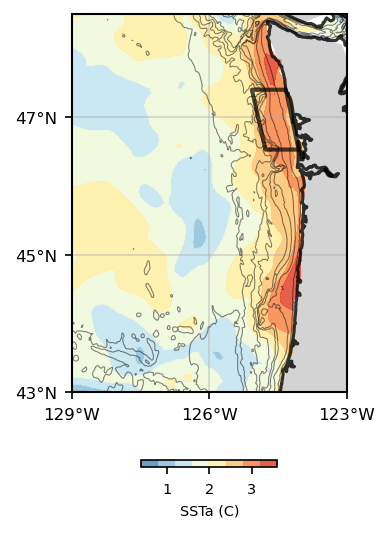

In [113]:
comap='RdYlBu_r'
cd = 'b'

cbs=True
tit='SSTa (C)'

if cbs==True:
    fig=plt.figure(figsize=(4,4),dpi=150)
    dom = ldom
else:
    fig=plt.figure(figsize=(3,3),dpi=150)
    dom = lqin
    
SSTa2 = SSTa.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]),time='2014-10-16')

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.set_extent([dom[1,0],dom[1,1],dom[0,0],dom[0,1]],crs=ccrs.PlateCarree())
if dom[1,1]-dom[1,0]>3:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,3)
else:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,1)
if dom[0,1]-dom[0,0]>3:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,2)
else:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,1)

ax.set_xticks(xt, crs=ccrs.PlateCarree())
ax.set_yticks(yt, crs=ccrs.PlateCarree())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
ax.set_aspect(1.5)
plt.contour(X,Y,topo,[-3000,-2000,-1000,-500,-200,-150, -100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)

vmi = int(np.floor(SSTa2.min()))
vmx = int(np.ceil(SSTa2.max()))

plt.contourf(SSTa2.lon, SSTa2.lat, SSTa2[0,:,:], cmap=comap, alpha=0.9, vmin=vmi, vmax=vmx)

if cbs==True:
    cb = plt.colorbar(fraction=0.015, orientation='horizontal', ticks=[*range(vmi,vmx+1)])
    cb.ax.tick_params(labelsize='x-small')
    cb.set_label(label=tit, size='x-small')#, weight='bold')

plt.tight_layout(h_pad=1)
plt.show()

In [93]:
# use OISST for large scale? 
url = '~/Downloads/oisst-avhrr-v02r01.20141015.nc'
mur2 = xr.open_dataset(url) # reads the online file and display it the same way as local files
mur = mur2.anom
mur.coords['lon'] = np.mod(mur.coords['lon'] + 180,360) - 180
mur = mur.sortby(mur.lon)
mur

<xarray.DataArray 'anom' (time: 1, zlev: 1, lat: 720, lon: 1440)>
array([[[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         [ nan,  nan,  nan, ...,  nan,  nan,  nan],
         ...,
         [0.16, 0.16, 0.16, ..., 0.16, 0.16, 0.16],
         [0.16, 0.16, 0.16, ..., 0.16, 0.16, 0.16],
         [0.16, 0.16, 0.16, ..., 0.16, 0.16, 0.16]]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * time     (time) datetime64[ns] 2014-10-15T12:00:00
  * zlev     (zlev) float32 0.0
Attributes:
    long_name:  Daily sea surface temperature anomalies
    valid_min:  -1200
    valid_max:  1200
    units:      Celsius

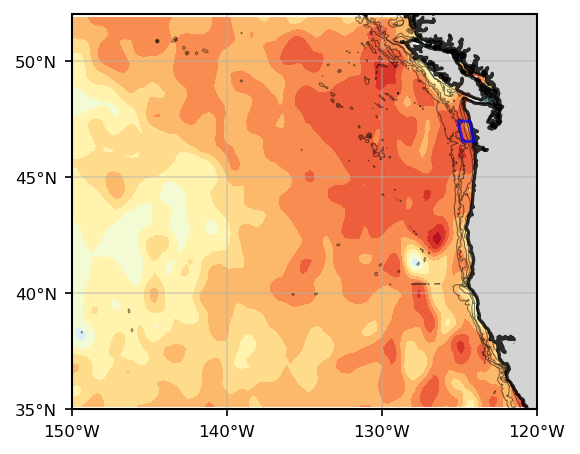

In [134]:
comap='RdYlBu_r'
cd = 'b'
dom = np.array([[35, 52],[-150, -120]])
cbs=True
tit='SSTa (C)'

fn = '/Users/sol/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(dom[0,0],dom[0,1]),x=slice(dom[1,0],dom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

if cbs==True:
    fig=plt.figure(figsize=(4,4),dpi=150)
    
mur = mur.sel(lat=slice(dom[0,0],dom[0,1]),lon=slice(dom[1,0],dom[1,1]))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.set_extent([dom[1,0],dom[1,1],dom[0,0],dom[0,1]],crs=ccrs.PlateCarree())
if dom[1,1]-dom[1,0]>3:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,10)
else:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,2)
if dom[0,1]-dom[0,0]>3:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,5)
else:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,5)

ax.set_xticks(xt, crs=ccrs.PlateCarree())
ax.set_yticks(yt, crs=ccrs.PlateCarree())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-2000,-1000,-500,-100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.contourf(mur.lon, mur.lat, mur[0,0,:,:], cmap=comap, vmin=-3.5, vmax=3.5,levels=10)
#if cbs==True:
#    cb = plt.colorbar(fraction=0.015)
#    cb.ax.tick_params(labelsize='x-small')
#cb.set_label(label=tit, size='x-small')#, weight='bold')
plt.plot(qbox[0,:],qbox[1,:],c='b',lw=1.5,zorder=5, alpha=0.7)

plt.tight_layout(h_pad=1)
plt.show()

In [137]:
fn = '../data/ETOPO1_QIN.nc'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
X,Y=np.meshgrid(topo.x,topo.y)


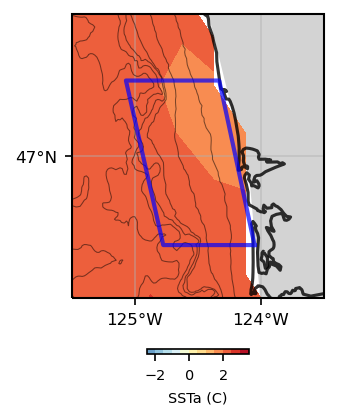

In [138]:
comap='RdYlBu_r'
cd = 'b'

cbs=False
tit='SSTa (C)'

if cbs==True:
    fig=plt.figure(figsize=(4,4),dpi=150)
    dom = ldom
else:
    fig=plt.figure(figsize=(3,3),dpi=150)
    dom = lqin
    

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.set_extent([dom[1,0],dom[1,1],dom[0,0],dom[0,1]],crs=ccrs.PlateCarree())
if dom[1,1]-dom[1,0]>3:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,3)
else:
    xt = range(int(np.ceil(dom[1,0])), int(np.floor(dom[1,1]))+1,1)
if dom[0,1]-dom[0,0]>3:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,2)
else:
    yt = range(int(np.ceil(dom[0,0])), int(np.floor(dom[0,1]))+1,1)

ax.set_xticks(xt, crs=ccrs.PlateCarree())
ax.set_yticks(yt, crs=ccrs.PlateCarree())
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
ax.set_aspect(1.5)
plt.contour(X,Y,topo,[-3000,-2000,-1000,-500,-200,-150, -100,-50],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.plot(qbox[0,:],qbox[1,:],c='b',lw=2,zorder=5, alpha=0.7)

plt.contourf(mur.lon, mur.lat, mur[0,0,:,:], cmap=comap, vmin=-3.5, vmax=3.5,levels=10)

if cbs==False:
    cb = plt.colorbar(fraction=0.015, orientation='horizontal', ticks=[*range(-4,4,2)])
    cb.ax.tick_params(labelsize='x-small')
    cb.set_label(label=tit, size='x-small')#, weight='bold')

plt.tight_layout(h_pad=1)
plt.show()

In [74]:
mur

<xarray.DataArray 'anom' (time: 1, zlev: 1, lat: 68, lon: 0)>
array([], shape=(1, 1, 68, 0), dtype=float32)
Coordinates:
  * lat      (lat) float32 35.125 35.375 35.625 35.875 ... 51.375 51.625 51.875
  * lon      (lon) float32 
  * time     (time) datetime64[ns] 2014-10-15T12:00:00
  * zlev     (zlev) float32 0.0
Attributes:
    long_name:  Daily sea surface temperature anomalies
    valid_min:  -1200
    valid_max:  1200
    units:      Celsius